<a href="https://colab.research.google.com/github/Vikram125609/Optical-Mark-Recognition/blob/main/Optical_Mark_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2 as cv2
from google.colab.patches import cv2_imshow

In [ ]:
# getting all images
image1 = cv2.imread('/content/1.jpg')
image2 = cv2.imread('/content/2.jpg')
image3 = cv2.imread('/content/3.jpg')
image4 = cv2.imread('/content/MCQPaper.jpg')
image5 = cv2.imread('/content/Thumbnail.jpg')

In [ ]:
# resizing the images
image1 = cv2.resize(image1,[700,700])
image2 = cv2.resize(image2,[700,700])
image3 = cv2.resize(image3,[700,700])
image4 = cv2.resize(image4,[700,700])
image5 = cv2.resize(image5,[700,700])

In [ ]:
# Print all images
cv2_imshow(image1)
cv2_imshow(image2)
cv2_imshow(image3)
cv2_imshow(image4)
cv2_imshow(image5)

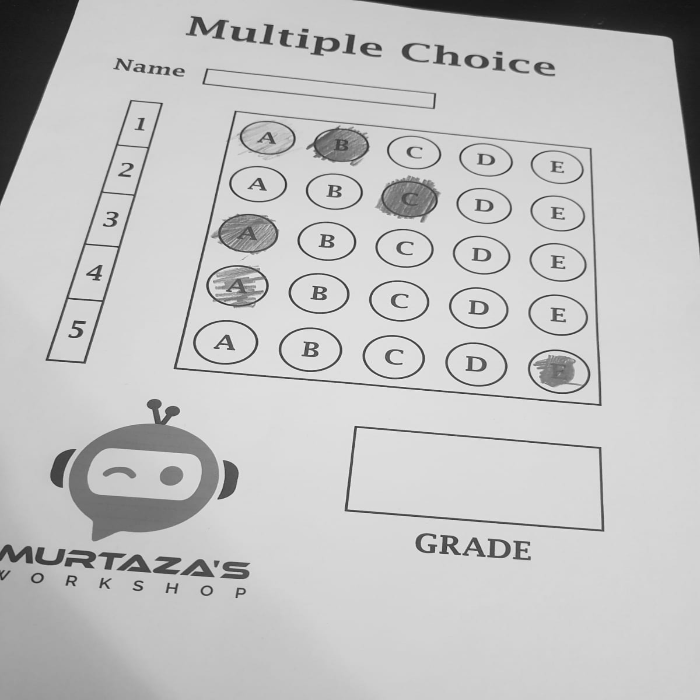

In [ ]:
# Preprocessing
gray_image1 = cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY)
gray_image2 = cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)
gray_image3 = cv2.cvtColor(image3,cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image1)

In [ ]:
# Bluring the Image
gray_blur_image1 = cv2.GaussianBlur(gray_image1,(5,5),1)
gray_blur_image2 = cv2.GaussianBlur(gray_image2,(5,5),1)
gray_blur_image3 = cv2.GaussianBlur(gray_image3,(5,5),1)

In [ ]:
# Canny
gray_blur_canny_image1 = cv2.Canny(gray_blur_image1,10,50)
gray_blur_canny_image2 = cv2.Canny(gray_blur_image2,10,50)
gray_blur_canny_image3 = cv2.Canny(gray_blur_image3,10,50)
cv2_imshow(gray_blur_canny_image1)
cv2_imshow(gray_blur_canny_image2)
cv2_imshow(gray_blur_canny_image3)

In [ ]:
# Utils function
def stackImages(imgArray,scale,lables=[]):
    rows = len(imgArray)
    cols = len(imgArray[0])
    rowsAvailable = isinstance(imgArray[0], list)
    width = imgArray[0][0].shape[1]
    height = imgArray[0][0].shape[0]
    if rowsAvailable:
        for x in range ( 0, rows):
            for y in range(0, cols):
                imgArray[x][y] = cv2.resize(imgArray[x][y], (0, 0), None, scale, scale)
                if len(imgArray[x][y].shape) == 2: imgArray[x][y]= cv2.cvtColor( imgArray[x][y], cv2.COLOR_GRAY2BGR)
        imageBlank = np.zeros((height, width, 3), np.uint8)
        hor = [imageBlank]*rows
        hor_con = [imageBlank]*rows
        for x in range(0, rows):
            hor[x] = np.hstack(imgArray[x])
            hor_con[x] = np.concatenate(imgArray[x])
        ver = np.vstack(hor)
        ver_con = np.concatenate(hor)
    else:
        for x in range(0, rows):
            imgArray[x] = cv2.resize(imgArray[x], (0, 0), None, scale, scale)
            if len(imgArray[x].shape) == 2: imgArray[x] = cv2.cvtColor(imgArray[x], cv2.COLOR_GRAY2BGR)
        hor= np.hstack(imgArray)
        hor_con= np.concatenate(imgArray)
        ver = hor
    if len(lables) != 0:
        eachImgWidth= int(ver.shape[1] / cols)
        eachImgHeight = int(ver.shape[0] / rows)
        #print(eachImgHeight)
        for d in range(0, rows):
            for c in range (0,cols):
                cv2.rectangle(ver,(c*eachImgWidth,eachImgHeight*d),(c*eachImgWidth+len(lables[d][c])*13+27,30+eachImgHeight*d),(255,255,255),cv2.FILLED)
                cv2.putText(ver,lables[d][c],(eachImgWidth*c+10,eachImgHeight*d+20),cv2.FONT_HERSHEY_COMPLEX,0.7,(255,0,255),2)
    return ver

def rectContour(contours):

    rectCon = []
    max_area = 0
    for i in contours:
        area = cv2.contourArea(i)
        if area > 50:
            peri = cv2.arcLength(i, True)
            approx = cv2.approxPolyDP(i, 0.02 * peri, True)
            if len(approx) == 4:
                rectCon.append(i)
    rectCon = sorted(rectCon, key=cv2.contourArea,reverse=True)
    #print(len(rectCon))
    return rectCon

def getCornerPoints(cont):
    peri = cv2.arcLength(cont, True) # LENGTH OF CONTOUR
    approx = cv2.approxPolyDP(cont, 0.02 * peri, True) # APPROXIMATE THE POLY TO GET CORNER POINTS
    return approx


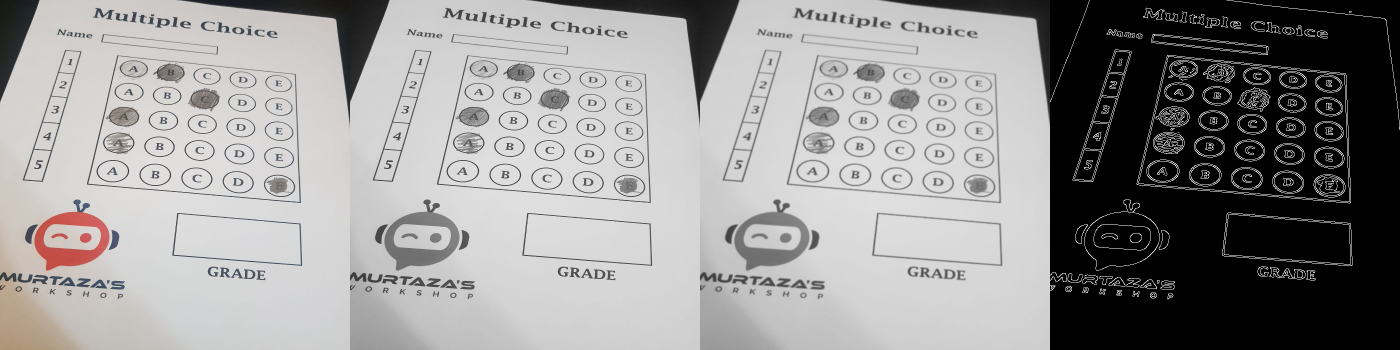

In [ ]:
# Displaying Stack Of Images
imgArray = [image1,gray_image1,gray_blur_image1,gray_blur_canny_image1]
image_stackes = stackImages(imgArray,0.5)
cv2_imshow(image_stackes)

In [ ]:
# Displaying the countour
contour_color_image1 = image1.copy()
contours,hierarchy = cv2.findContours(gray_blur_canny_image1,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
cv2.drawContours(contour_color_image1,contours,-1,(0,255,0),10)
rectCon = rectContour(contours) # FILTER FOR RECTANGLE CONTOURS
biggestPoints = getCornerPoints(rectCon[0]) # GET CORNER POINTS OF THE BIGGEST RECTANGLE
# print(rectCon[0])
gradePoints = getCornerPoints(rectCon[1]) # GET CORNER POINTS OF THE SECOND BIGGEST RECTANGLE

10
8
12
10
12
9
8
9
10
13
7
7
4
11
4
4
3
8
10
11
8
10
9
10
8
